/var/folders/19/_3__wm5j79qg185xqr0nw0m80000gn/T/ipykernel_8449/358497285.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


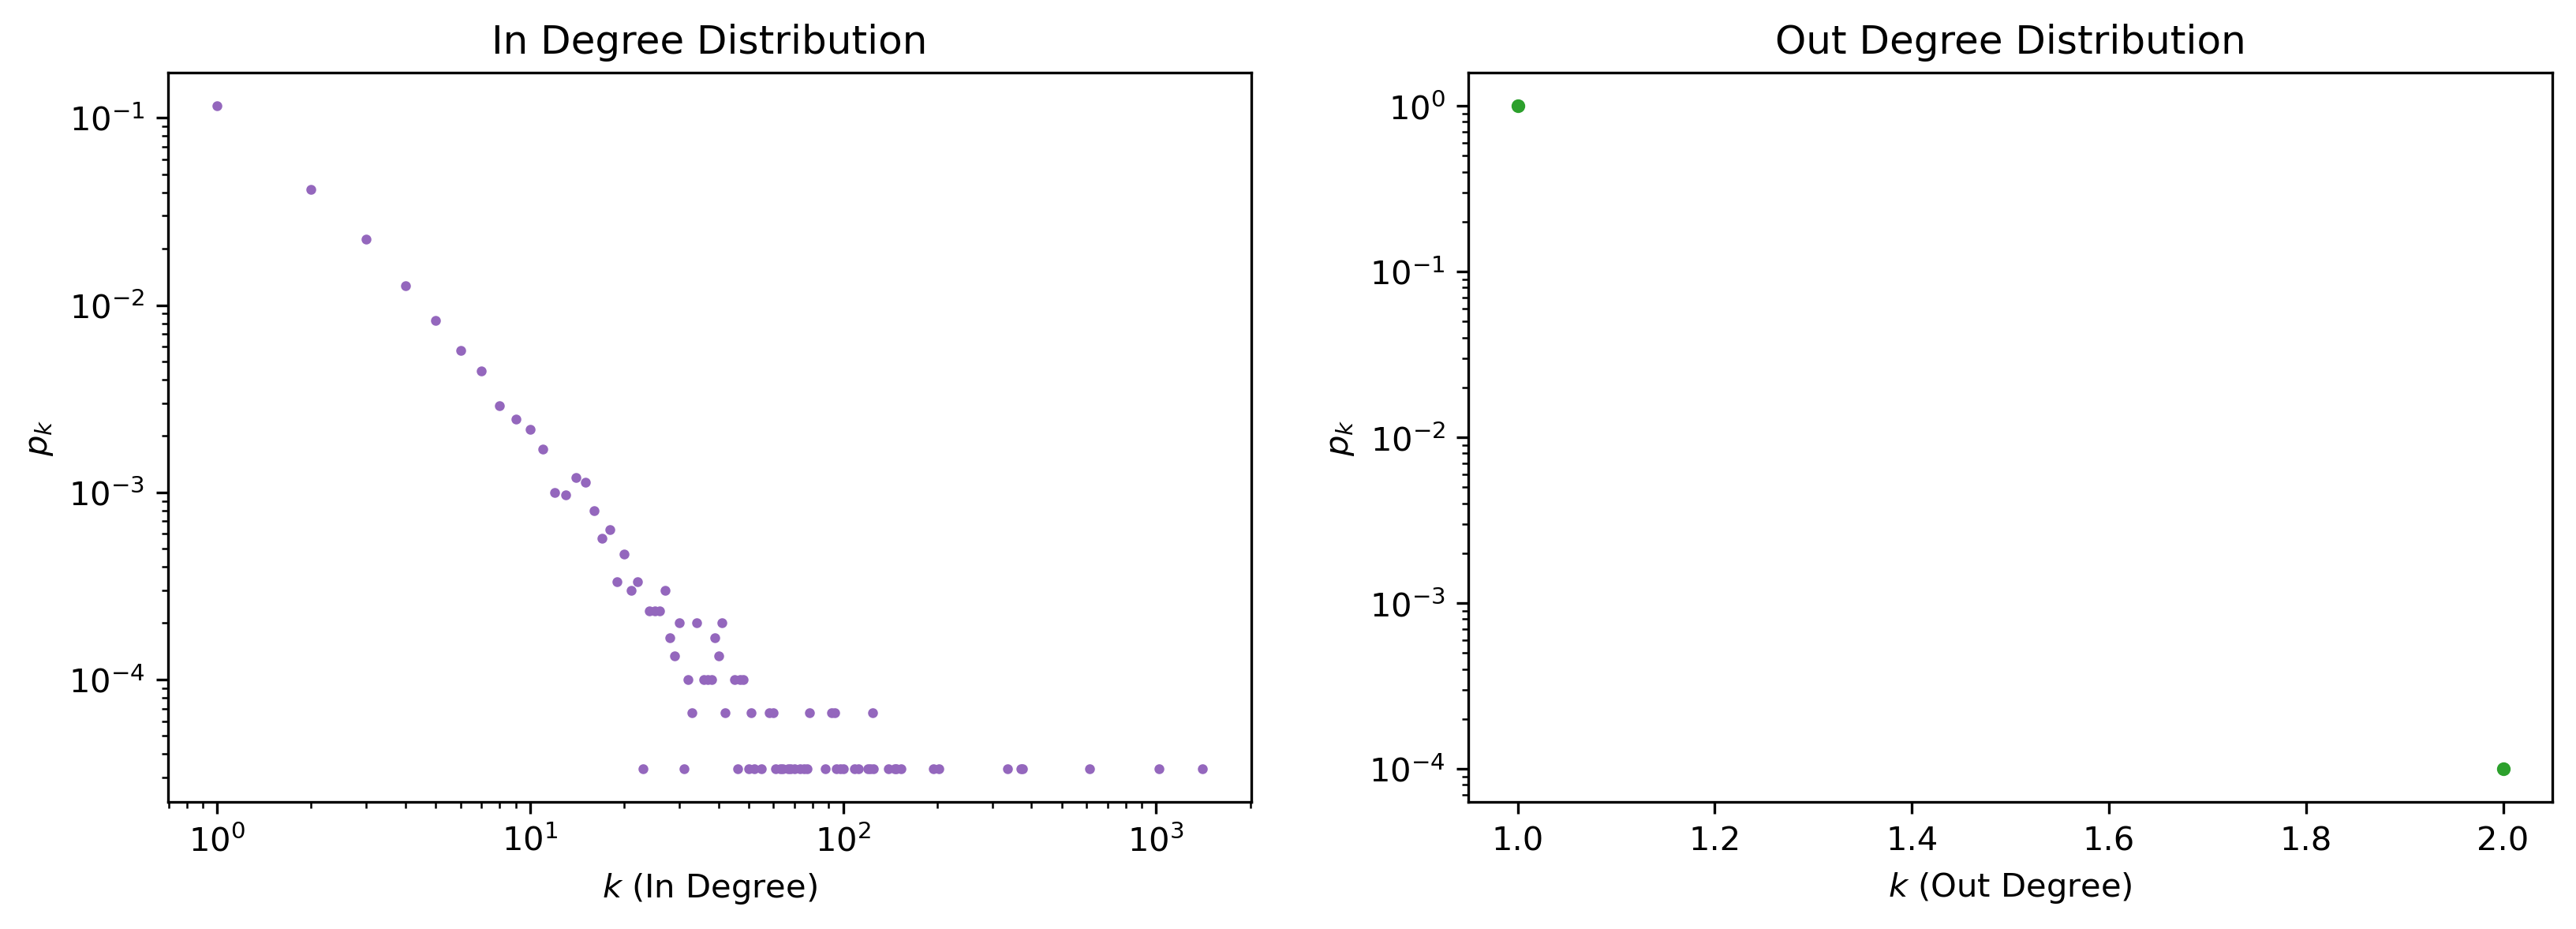

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def copyingModel(n,p,m=1):
    G = nx.DiGraph()
    G.add_edges_from([(0,1),(1,0),(0,2),(2,0),(1,2),(2,1)])
    if n<=3:
        print("number of nodes must > 3")
        return G
    for source in range(3,n):
        for k in range(m):
            target = np.random.randint(0,source)
            flag = np.random.random()
            if flag < p:
                G.add_edge(source,target)
            else:
                succ = list(G.successors(target))
                choiceNodes = np.random.choice(succ,1)
                G.add_edge(source, choiceNodes[0])
    return G

class degreeDistrib():
    def __init__(self,G):
        in_degree = dict(G.in_degree())
        in_degree_values = list(filter(lambda val: val > 0, in_degree.values()))
        self.in_value = np.array(sorted(set(in_degree_values)))
        self.in_count = np.array([in_degree_values.count(x) for x in self.in_value])
        self.in_p = self.in_count/G.number_of_nodes()
        out_degree = dict(G.out_degree())
        out_degree_values = list(filter(lambda val: val > 0, out_degree.values()))
        self.out_value = np.array(sorted(set(out_degree_values)))
        self.out_count = np.array([out_degree_values.count(x) for x in self.out_value])
        self.out_p = self.out_count/G.number_of_nodes()

G = copyingModel(30000,0.3,1)

gDistrib = degreeDistrib(G)
in_value = gDistrib.in_value
in_p = gDistrib.in_p
out_value = gDistrib.out_value
out_p = gDistrib.out_p

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (13,4),dpi = 300)
ax1.scatter(in_value,in_p,color="C4",s= 4) #在双对坐标轴上绘制度分布曲线
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k$ (In Degree)')
ax1.set_ylabel(r'$p_k$')
ax1.set_title('In Degree Distribution')
ax2.scatter(out_value,out_p,color="C2",s= 10) #在双对坐标轴上绘制度分布曲线
ax2.set_yscale('log')
ax2.set_xlabel(r'$k$ (Out Degree)')
ax2.set_ylabel(r'$p_k$')
ax2.set_title('Out Degree Distribution')
fig.show()
fig.savefig('2-1-1.png')

In [235]:
G = nx.DiGraph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edges_from([(0,1),(1,0),(0,2),(2,0),(1,2),(2,1)])
succ = list(G.successors(2))
np.random.choice(succ,1)

{0: 2,
 1: 2,
 2: 2,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1}

In [6]:
G = copyingModel(1000,0.3,1)
nx.write_gexf(G, "copyingModel3000.gexf")